<a href="https://colab.research.google.com/github/NippunSharma/Locally-Weighted-Regression/blob/master/Locally_Weighted_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

class LocallyWeightedRegression:
  def __init__(self, learning_rate=0.01, n_iter=500, bandwidth=1):
    self.lr = learning_rate
    self.n_iter = n_iter
    self.band = bandwidth
    self.theta = None
  
  # weight is of the form of a gaussian bell curve
  def weight(self, X_test, X_train, band):
    return np.math.exp(-np.sum((X_train - X_test)**2)/2*(band**2))
  
  def fit_predict(self, X_train, y_train, X_test, learning_rate, iter, bandwidth):
    self.lr = learning_rate
    self.n_iter = iter
    self.band = bandwidth
    
    X_train['Constant'] = np.ones((len(X_train), 1))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)

    if(len(X_train.shape) == 1):
      n_features = 1
      n_samples = X_train.shape[0]
    else:
      n_samples, n_features = X_train.shape

    self.theta = np.zeros((n_features, 1))

    for t in range(self.n_iter):
      for i in range(n_samples):
        self.theta += 2*self.lr*(self.weight(X_test, X_train[i], self.band))*(y_train[i] - np.dot(self.theta.T, X_train[i].reshape((n_features, 1))))*(X_train[i].reshape((n_features, 1)))
    
    return (np.dot(self.theta.T, X_test.reshape((n_features, 1))))

In [0]:
import pandas as pd
data = pd.read_csv('/content/Salary_Data.csv')
X_train = data['YearsExperience']
X_train = pd.DataFrame(X_train)
y_train = data['Salary']
X_test = pd.DataFrame({'YearsExperience':[5], 'Constant':[1]})

model = LocallyWeightedRegression()
pred = model.fit_predict(X_train, y_train, X_test, learning_rate=0.01, iter=1, bandwidth=1)

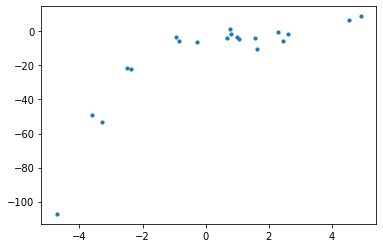

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

# Generating non-linear data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()


In [0]:
# fitting linear regression to this data
# code for linear model taking from corresponding repository

class linear_model:
    def __init__(self,learning_rate=0.01, l2_reg=0, n_iter=1000):
        self.lr=learning_rate
        self.l2_reg=l2_reg
        self.n_iter=n_iter
        self.w=None
        self.b=None
        
    def fit(self,X,y,l2_reg=0,n_iter=1000,learning_rate=0.01,verbose=0):
        
        self.l2_reg=l2_reg
        self.n_iter=n_iter
        self.lr=learning_rate
        
        if(len(X.shape)==1):
            n_samples=X.shape
            n_features=1
        else:
            n_samples,n_features=X.shape
        self.w=np.zeros((n_features,1))
        self.b=0
        
        print('Starting -- learning_rate:',self.lr,',iterations:',self.n_iter,',L2_regularization:',self.l2_reg,'\n')
        for _ in range(self.n_iter):
            s1=0
            s2=0
            for idx,x_i in enumerate(X):
                s1+=(np.dot(self.w.T,x_i)+self.b)*x_i - y[idx]*x_i
                s2+=(np.dot(self.w.T,x_i)+self.b - y[idx])
            if(verbose!=0):
                print('Iteration number :',_)
                if((_)%10==0):
                    print('w=',self.w,'b=',self.b,'\n')
            self.w-=self.lr*(self.w*self.l2_reg + 2*s1/n_samples)
            self.b-=self.lr*(2*s2/n_samples)
            
    def predict(self,X):
        predicts=[]
        for idx,x_i in enumerate(X):
            predicts.append(np.dot(self.w.T,x_i)+self.b)
        return predicts

Starting -- learning_rate: 0.01 ,iterations: 1000 ,L2_regularization: 0 



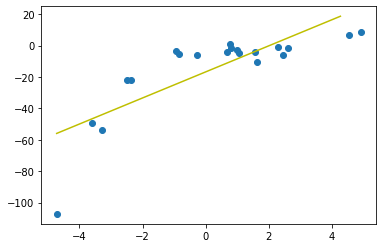

In [129]:
model1 = linear_model()
model1.fit(x,y)

x_range = np.arange(min(x), max(x), 1)

plt.scatter(x,y)
plt.plot(x_range,model1.w[0][0]*x_range+model1.b[0][0], color='y')
plt.show()

In [0]:
# predicting values using Locally Weighted Regression for each integral value of 'x'

x = pd.DataFrame({'Feature1':x})
model2 = LocallyWeightedRegression()
y_pred_model_2 = []
for i in x_range:
  y_pred_model_2.append(model2.fit_predict(x, y, np.array([[i],[1.0]]), learning_rate=0.01, iter=5, bandwidth=0.20))

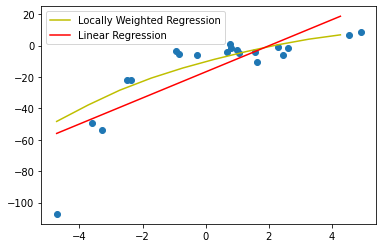

In [135]:
y_pred_model_2 = np.array(y_pred_model_2)

# plotting
plt.scatter(x['Feature1'],y)
plt.plot(x_range,y_pred_model_2[:,0], color='y', label='Locally Weighted Regression')
plt.plot(x_range,model1.w[0][0]*x_range+model1.b[0][0], color='r', label='Linear Regression')
plt.legend()
plt.show()

**Inference:**
We can see that Locally Weighted Average(LWA) works better than linear regression for 
non-linear data. But for large datasets Linear Regression is still preferred because it is faster
and '***parametric***' whereas LWA is '***non-parametric***'.